# Dataset exploration


*   Explore the **In-shop Clothes Retrieval Benchmark** of the **DeepFashion** dataset
http://mmlab.ie.cuhk.edu.hk/projects/DeepFashion/InShopRetrieval.html
*   Import the dataset in `Google Colab` instead of downloading the whole dataset locally
*   Visualize some samples from the dataset
*   Look for variations and correlations in the dataset
*   Use the `matplotlib` and `seaborn` library to visualize data



In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import tensorflow as tf
import PIL
import cv2 as cv 
from google.colab.patches import cv2_imshow 
from skimage import io
from PIL import Image 
from numpy import asarray

In [9]:
%cd /content/drive/MyDrive/image_dataset
%ls

/content/drive/MyDrive/image_dataset
img.zip


In [44]:
!unzip '/content/drive/MyDrive/image_dataset/img.zip'  -d '/content/drive/MyDrive/image_data'

Archive:  /content/drive/MyDrive/image_dataset/img.zip
replace /content/drive/MyDrive/image_data/img/MEN/Denim/id_00000080/01_1_front.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [10]:
%cd /content/drive/MyDrive/image_data/img
%ls
%cd /content/drive/MyDrive/image_data/img/MEN
%ls
%cd /content/drive/MyDrive/image_data/img/MEN/Denim
%ls
%cd /content/drive/MyDrive/image_data/img/MEN/Denim/id_00000080
%ls

/content/drive/MyDrive/image_data/img
MEN/  WOMEN/
/content/drive/MyDrive/image_data/img/MEN
Denim/          Pants/         Shorts/   Sweaters/             Tees_Tanks/
Jackets_Vests/  Shirts_Polos/  Suiting/  Sweatshirts_Hoodies/
/content/drive/MyDrive/image_data/img/MEN/Denim
id_00000080/  id_00001223/  id_00003341/  id_00005447/  id_00006465/
id_00000089/  id_00001231/  id_00003570/  id_00005608/  id_00006841/
id_00000182/  id_00001952/  id_00003734/  id_00005663/  id_00006959/
id_00000265/  id_00002243/  id_00003845/  id_00005724/  id_00007216/
id_00000313/  id_00002476/  id_00003879/  id_00005769/  id_00007297/
id_00000353/  id_00002559/  id_00004051/  id_00005826/  id_00007300/
id_00000516/  id_00002578/  id_00004064/  id_00005887/  id_00007524/
id_00000565/  id_00002707/  id_00004714/  id_00006034/  id_00007570/
id_00000750/  id_00002735/  id_00004807/  id_00006106/  id_00007607/
id_00000826/  id_00002760/  id_00004998/  id_00006117/
id_00000867/  id_00003074/  id_00005208/  id_0

In [64]:
dataset_path=os.listdir('/content/drive/MyDrive/image_data/img/MEN/Denim')
room_types=os.listdir('/content/drive/MyDrive/image_data/img/MEN/Denim')
print(room_types)
print('types of room found ', len(room_types))


['id_00000080', 'id_00000089', 'id_00000182', 'id_00000265', 'id_00000313', 'id_00000353', 'id_00000516', 'id_00000565', 'id_00000750', 'id_00000826', 'id_00000867', 'id_00000938', 'id_00001198', 'id_00001223', 'id_00001231', 'id_00001952', 'id_00002243', 'id_00002476', 'id_00002559', 'id_00002578', 'id_00002707', 'id_00002735', 'id_00002760', 'id_00003074', 'id_00003242', 'id_00003252', 'id_00003341', 'id_00003570', 'id_00003734', 'id_00003845', 'id_00003879', 'id_00004051', 'id_00004064', 'id_00004714', 'id_00004807', 'id_00004998', 'id_00005208', 'id_00005241', 'id_00005378', 'id_00005447', 'id_00005608', 'id_00005663', 'id_00005724', 'id_00005769', 'id_00005826', 'id_00005887', 'id_00006034', 'id_00006106', 'id_00006117', 'id_00006359', 'id_00006407', 'id_00006439', 'id_00006465', 'id_00006841', 'id_00006959', 'id_00007216', 'id_00007297', 'id_00007300', 'id_00007524', 'id_00007570', 'id_00007607']
types of room found  61


In [63]:
rooms=[]
for item in room_types:
  all_rooms=os.listdir('/content/drive/MyDrive/image_data/img/MEN/Denim'+'/'+item)
for room in all_rooms:
  rooms.append((item,str('/content/drive/MyDrive/image_data/img/MEN/Denim'+'/'+item)+'/'+room))

rooms


[('id_00007607',
  '/content/drive/MyDrive/image_data/img/MEN/Denim/id_00007607/01_6_flat.jpg'),
 ('id_00007607',
  '/content/drive/MyDrive/image_data/img/MEN/Denim/id_00007607/01_3_back.jpg'),
 ('id_00007607',
  '/content/drive/MyDrive/image_data/img/MEN/Denim/id_00007607/01_1_front.jpg'),
 ('id_00007607',
  '/content/drive/MyDrive/image_data/img/MEN/Denim/id_00007607/01_7_additional.jpg'),
 ('id_00007607',
  '/content/drive/MyDrive/image_data/img/MEN/Denim/id_00007607/01_2_side.jpg')]

In [14]:
rooms_df=pd.DataFrame(data=rooms, columns=['room_type','image'])
print(rooms_df.head())

     room_type                                              image
0  id_00007607  /content/drive/MyDrive/image_data/img/MEN/Deni...
1  id_00007607  /content/drive/MyDrive/image_data/img/MEN/Deni...
2  id_00007607  /content/drive/MyDrive/image_data/img/MEN/Deni...
3  id_00007607  /content/drive/MyDrive/image_data/img/MEN/Deni...
4  id_00007607  /content/drive/MyDrive/image_data/img/MEN/Deni...


In [15]:
rooms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   room_type  5 non-null      object
 1   image      5 non-null      object
dtypes: object(2)
memory usage: 208.0+ bytes


In [65]:
rooms_df.describe()

,room_type,image
count,5,5
unique,1,5
top,id_00007607,/content/drive/MyDrive/image_data/img/MEN/Deni...
freq,5,1


In [66]:
print('total no of rooms in dataset: ',len(rooms_df))
room_count=rooms_df['room_type'].value_counts()
print('rooms in each category:')
print(room_count)

total no of rooms in dataset:  5
rooms in each category:
id_00007607    5
Name: room_type, dtype: int64


In [18]:
first=plt.imread('/content/drive/MyDrive/image_data/img/MEN/Denim/id_00007607/01_6_flat.jpg')
dims=np.shape(first)
print(first)

[[[242 242 242]
  [242 242 242]
  [242 242 242]
  ...
  [242 242 242]
  [242 242 242]
  [242 242 242]]

 [[242 242 242]
  [242 242 242]
  [242 242 242]
  ...
  [242 242 242]
  [242 242 242]
  [242 242 242]]

 [[242 242 242]
  [242 242 242]
  [242 242 242]
  ...
  [242 242 242]
  [242 242 242]
  [242 242 242]]

 ...

 [[242 242 242]
  [242 242 242]
  [242 242 242]
  ...
  [242 242 242]
  [242 242 242]
  [242 242 242]]

 [[242 242 242]
  [242 242 242]
  [242 242 242]
  ...
  [242 242 242]
  [242 242 242]
  [242 242 242]]

 [[242 242 242]
  [242 242 242]
  [242 242 242]
  ...
  [242 242 242]
  [242 242 242]
  [242 242 242]]]


In [34]:
image = PIL.Image.open('/content/drive/MyDrive/image_data/img/MEN/Denim/id_00007607/01_6_flat.jpg')


width, height = image.size

print(width, height)

256 256


In [37]:

print(first.dtype)

print(first.shape[0])

print(first.shape[1])

print(first.shape[2])

uint8
256
256
3


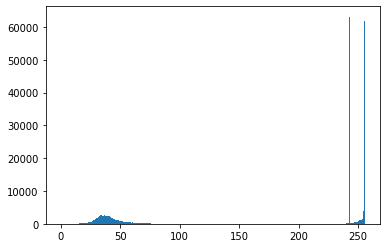

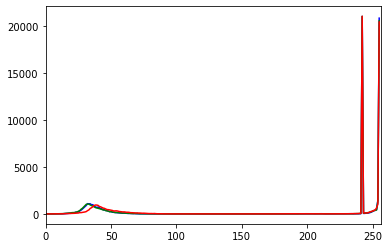

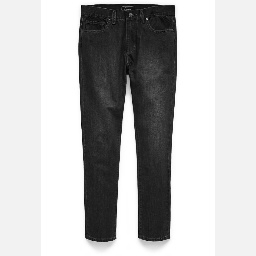

In [52]:
plt.hist(first.ravel(),bins = 256, range = [0,256]) 
plt.show()
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([first],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()
gray_image = cv.cvtColor(first, cv.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

In [19]:
np.min(first) ,np.max(first)

(0, 255)

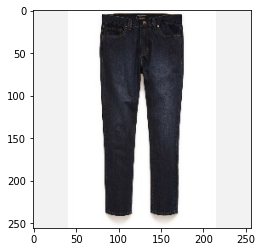

In [20]:
plt.imshow(first)

Whole Dataset is organised into two  categories :MEN and WOMEN which further divided into various subclass.
images are of jpg formate.
Size of the image is 256*256*3.
matrix is of dtype unit8.


# New section

# ResNET Architecture



*   Read about **ResNET** architecture and advantage of residual blocks
*   Build a simple 6-layer ConvNET and train it on **CIFAR-10** dataset
*   Introduce residual blocks in the above model and compare the results 
*   Use the `tensorflow` library to import ResNET model with imgaenet weights
*   Change some parameters and document the results
*   Visualize the output of some layers and add/delete layers to see the effect of individual layers on the model accuracy



In [1]:
# Add code cells in this section
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Input,ReLU,BatchNormalization,GlobalAveragePooling2D,Add,Dropout
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import math
from keras.models import Model
from keras import losses


In [2]:
batch_size=50
img_width, img_height,img_num_channels=32,32,3
loss_function=sparse_categorical_crossentropy
no_classes=10
no_epochs=5
optimizer=Adam()
validation_split=0.2
verbosity=1

In [3]:
(input_train,target_train),(input_test,target_test)=cifar10.load_data()
input_shape=(img_width,img_height, img_num_channels)
input_test=input_test.astype('float32')
input_train=input_train.astype('float32')
input_test=input_test/255
input_train=input_train/255

170500096/170498071 [==============================] - 12s 0us/step


In [4]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3), activation='relu' , input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128,kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

In [55]:
model.compile(loss=loss_function,optimizer=optimizer,metrics=['accuracy'])
history=model.fit(input_train, target_train,batch_size=batch_size,epochs=no_epochs,verbose=verbosity,validation_split=validation_split)


Epoch 1/5
800/800 [==============================] - 60s 74ms/step - loss: 1.7558 - accuracy: 0.3292 - val_loss: 1.4145 - val_accuracy: 0.4743
Epoch 2/5
800/800 [==============================] - 59s 73ms/step - loss: 1.3267 - accuracy: 0.5155 - val_loss: 1.2174 - val_accuracy: 0.5650
Epoch 3/5
800/800 [==============================] - 60s 75ms/step - loss: 1.1536 - accuracy: 0.5875 - val_loss: 1.2000 - val_accuracy: 0.5846
Epoch 4/5
800/800 [==============================] - 59s 74ms/step - loss: 1.0190 - accuracy: 0.6391 - val_loss: 1.0432 - val_accuracy: 0.6327
Epoch 5/5
800/800 [==============================] - 59s 74ms/step - loss: 0.9178 - accuracy: 0.6787 - val_loss: 1.0143 - val_accuracy: 0.6501


Test loss:1.256818175315857/Test accuracy:0.5526999831199646


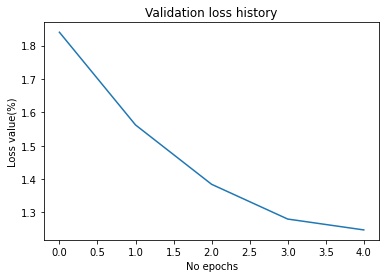

In [ ]:
score=model.evaluate(input_test,target_test,verbose=0)
print(f'Test loss:{score[0]}/Test accuracy:{score[1]}')
plt.plot(history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value(%)')
plt.xlabel('No epochs')
plt.show()

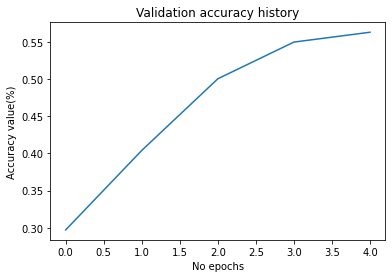

In [ ]:
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value(%)')
plt.xlabel('No epochs')
plt.show()

In [14]:
model_2=Sequential()
model_2.add(Conv2D(32,kernel_size=(3,3), activation='relu' , input_shape=input_shape ,name='l1'))
model_2.add(BatchNormalization(name='b1'))

model_2.add(Conv2D(32,kernel_size=(3,3), activation='relu' , input_shape=input_shape ,name='l2'))
model_2.add(BatchNormalization(name='b2'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Conv2D(64,kernel_size=(3,3), activation='relu' , name='l3'))
model_2.add(BatchNormalization(name='b3'))

model_2.add(Conv2D(64,kernel_size=(3,3), activation='relu' , name='l4'))
model_2.add(BatchNormalization(name='b4'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Conv2D(128,kernel_size=(3,3), activation='relu' ,name='l5'))
model_2.add(BatchNormalization(name='b5'))
model_2.add(Conv2D(128,kernel_size=(3,3), activation='relu' ,name='l6'))
model_2.add(BatchNormalization(name='b6'))
#model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Flatten())
model_2.add(Dense(256, activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(Dense(128, activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(Dense(128, activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(Dense(128, activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(Dense(128, activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(Dense(128, activation='relu'))
model_2.add(Dense(no_classes, activation='softmax'))


In [15]:
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
l1 (Conv2D)                  (None, 30, 30, 32)        896       
_________________________________________________________________
b1 (BatchNormalization)      (None, 30, 30, 32)        128       
_________________________________________________________________
l2 (Conv2D)                  (None, 28, 28, 32)        9248      
_________________________________________________________________
b2 (BatchNormalization)      (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
l3 (Conv2D)                  (None, 12, 12, 64)        18496     
_________________________________________________________________
b3 (BatchNormalization)      (None, 12, 12, 64)       

In [16]:
model_2.compile(loss=loss_function,optimizer=optimizer,metrics=['accuracy'])
history=model_2.fit(input_train, target_train,batch_size=batch_size,epochs=no_epochs,verbose=verbosity,validation_split=validation_split)


Epoch 1/5
800/800 [==============================] - 176s 218ms/step - loss: 1.6130 - accuracy: 0.4047 - val_loss: 1.3520 - val_accuracy: 0.5269
Epoch 2/5
800/800 [==============================] - 175s 218ms/step - loss: 1.2005 - accuracy: 0.5914 - val_loss: 1.1877 - val_accuracy: 0.5886
Epoch 3/5
800/800 [==============================] - 181s 226ms/step - loss: 1.0087 - accuracy: 0.6606 - val_loss: 1.0157 - val_accuracy: 0.6502
Epoch 4/5
800/800 [==============================] - 183s 228ms/step - loss: 0.8905 - accuracy: 0.7053 - val_loss: 0.9369 - val_accuracy: 0.6843
Epoch 5/5
800/800 [==============================] - 182s 228ms/step - loss: 0.8036 - accuracy: 0.7388 - val_loss: 1.1203 - val_accuracy: 0.6394


Test loss:1.1463077068328857/Test accuracy:0.6416000127792358


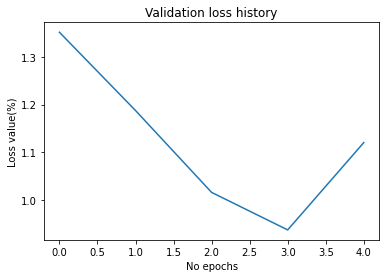

In [18]:
score=model_2.evaluate(input_test,target_test,verbose=0)
print(f'Test loss:{score[0]}/Test accuracy:{score[1]}')
plt.plot(history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value(%)')
plt.xlabel('No epochs')
plt.show()

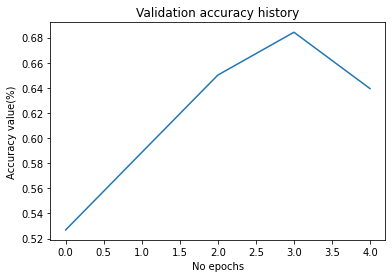

In [19]:
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value(%)')
plt.xlabel('No epochs')
plt.show()

**Using residual block**

In [20]:
  (x_train, y_train),(x_test , y_test)=cifar10.load_data()

In [21]:
x_val=x_train[-5000:]
y_val=y_train[-5000:]
x_train=x_train[:-5000]
y_train=y_train[:-5000]


x_train=x_train/255.0
x_val=x_val/255.0
x_test=x_test/255.0



In [22]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],3)
x_val=x_val.reshape(x_val.shape[0],x_val.shape[1],x_val.shape[2],3)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],3)

In [23]:
input_shape=[32,32,3]
output_shape=10

In [24]:
y_train=  tf.keras.utils.to_categorical(y_train,output_shape)
y_val=tf.keras.utils.to_categorical(y_val, output_shape)
y_test=tf.keras.utils.to_categorical(y_test,output_shape)

  

In [27]:
#class NetworkModel:
 #  def resnet(self, input_shape, output_shape):
input=Input(shape=(input_shape[0],input_shape[1],input_shape[2]))
l1_cnv2d_1=Conv2D(filters=32,kernel_size=(3,3), strides=(1,1), padding='same',  name='l1_cnv2d_1')(input)
l1_relu_1=ReLU(name='l1_relu_1')(l1_cnv2d_1)
l1_bn_1=BatchNormalization(name='l1_bn_1')(l1_relu_1)
l1_cnv2d_2=Conv2D(filters=64,kernel_size=(3,3), strides=(1,1), padding='same', name='l1_cnv2d' )(l1_bn_1)
l1_relu_2=ReLU(name='l1_relu_2')(l1_cnv2d_2)
l1_out=BatchNormalization(name='l1_out')(l1_relu_2)


l2_cnv2d_1=Conv2D(filters=64,kernel_size=(1,1), strides=(1,1), padding='same',  name='l2_cnv2d_1' )(l1_out)
l2_relu_1=ReLU(name='l2_relu_1')(l2_cnv2d_1)
l2_bn_1=BatchNormalization(name='l2_bn_1')(l2_relu_1)
 
l2_add=Add()([l1_out,l2_bn_1])

l2_cnv2d_2=Conv2D(filters=128,kernel_size=(1,1), strides=(1,1), padding='same',  name='l2_cnv2d_2' )(l2_add)
l2_relu_2=ReLU(name='l2_relu_2')(l2_cnv2d_2)
l2_out=BatchNormalization(name='l2_out')(l2_relu_2)

l3_cnv2d_1=Conv2D(filters=128,kernel_size=(1,1), strides=(1,1), padding='same', name='l3_cnv2d_1' )(l2_out)
l3_relu_1=ReLU(name='l3_relu_1')(l3_cnv2d_1)
l3_bn_1=BatchNormalization(name='l3_bn_1')(l3_relu_1)
 
l3_add=Add()([l2_out,l3_bn_1])

l3_cnv2d_2=Conv2D(filters=128,kernel_size=(1,1), strides=(1,1), padding='same',  name='l3_cnv2d_2' )(l3_add)
l3_relu_2=ReLU(name='l3_relu_2')(l3_cnv2d_2)
l3_out=BatchNormalization(name='l3_out')(l3_relu_2)

l4_avg_p= GlobalAveragePooling2D()(l3_out)

x1=Dense(256, activation='relu')(l4_avg_p)
x2=Dropout(0.2)(x1)
x3=Dense(128, activation='relu')(x2)
x4=Dropout(0.2)(x3)
x5=Dense(128, activation='relu')(x4)
x6=Dropout(0.2)(x5)
x7=Dense(128, activation='relu')(x6)
x8=Dropout(0.2)(x7)
x9=Dense(128, activation='relu')(x8)
output=Dense(output_shape, name='model_output', activation='softmax' )(x5)
model_1=Model(input,output)




 




In [28]:
model_1.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Total params: 150,794
Trainable params: 149,706
Non-trainable params: 1,088
__________________________________________________________________________________________________


In [29]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape, x_val.shape,y_val.shape)
#print(input_train.shape,traget_train.shape)

(45000, 32, 32, 3) (10000, 32, 32, 3) (45000, 10) (10000, 10) (5000, 32, 32, 3) (5000, 10)


In [30]:
model_1.compile(loss=losses.categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])

history=model_1.fit(x_train ,y_train , batch_size=50, epochs=3, verbose=verbosity, validation_data=(x_val,y_val))




Epoch 1/3
900/900 [==============================] - 633s 689ms/step - loss: 2.0258 - accuracy: 0.2231 - val_loss: 1.6341 - val_accuracy: 0.3614
Epoch 2/3
900/900 [==============================] - 607s 674ms/step - loss: 1.6159 - accuracy: 0.3796 - val_loss: 1.4878 - val_accuracy: 0.4384
Epoch 3/3
900/900 [==============================] - 598s 665ms/step - loss: 1.4779 - accuracy: 0.4406 - val_loss: 1.4316 - val_accuracy: 0.4638


Test loss:1.4384351968765259/Test accuracy:0.4661000072956085


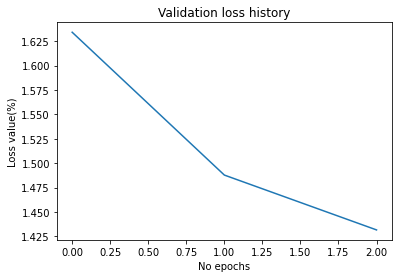

In [32]:
score=model_1.evaluate(x_test,y_test,verbose=0)
print(f'Test loss:{score[0]}/Test accuracy:{score[1]}')
plt.plot(history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value(%)')
plt.xlabel('No epochs')
plt.show()

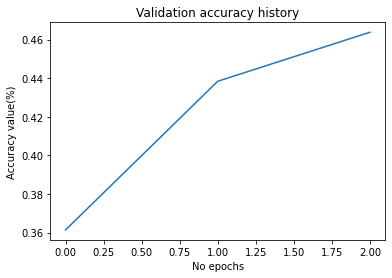

In [33]:
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value(%)')
plt.xlabel('No epochs')
plt.show()
  